# Handwritten Digit Recognition using CNN

Author - Martin Tomov Feb 2024

Importing necessary Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Importing the data and splitting it into trainig and testing data sets

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)


11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(28, 28)


Visualizing the Data

<Figure size 640x480 with 0 Axes>

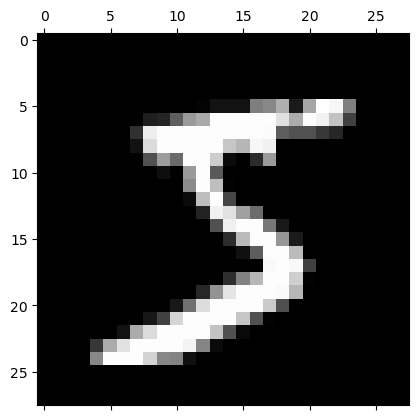

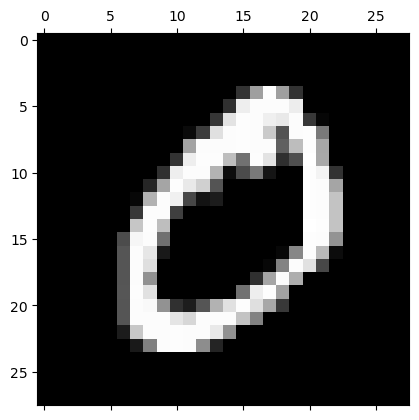

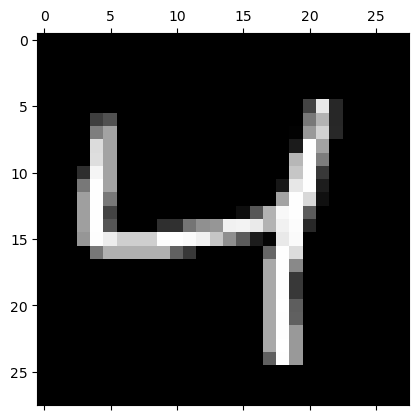

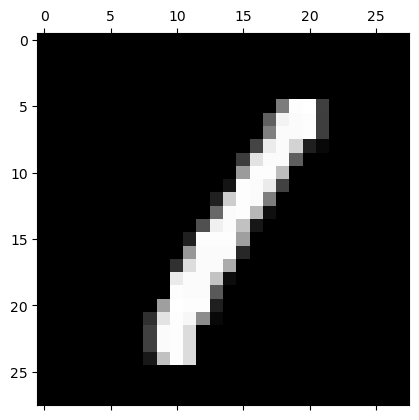

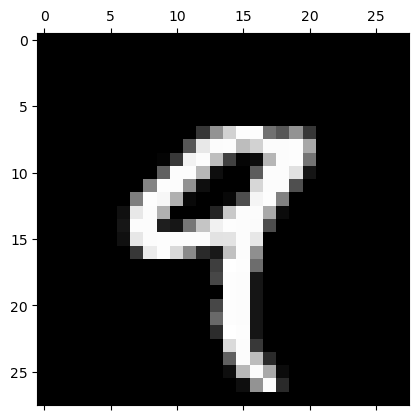

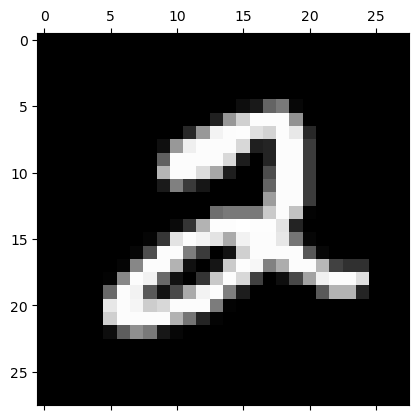

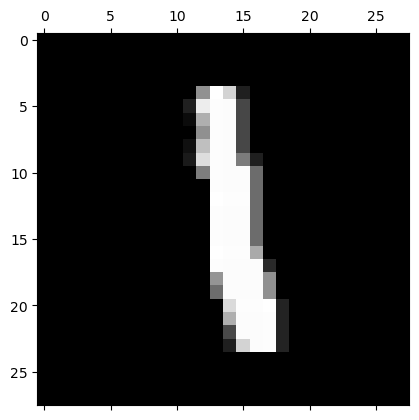

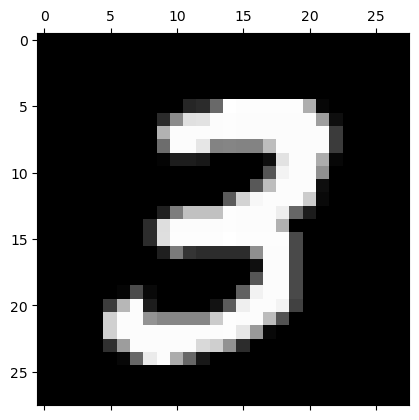

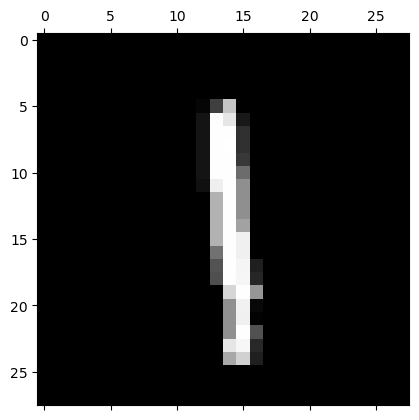

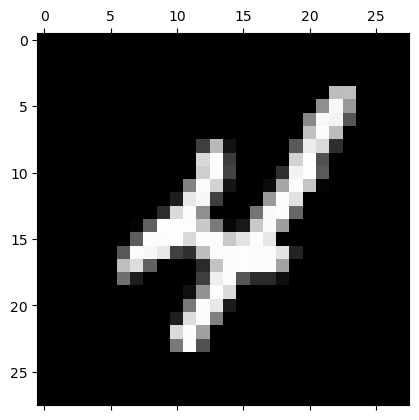

In [5]:
plt.gray()
for i in range(10):
    plt.matshow(X_train[i])

Normalizing the training data set

In [6]:
len(X_train.data)  # total number of inputs

print(X_train[0]/255)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the model


In [7]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(20, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3711 - accuracy: 0.9369
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0711 - accuracy: 0.9785
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0550 - accuracy: 0.9828
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0457 - accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0373 - accuracy: 0.9884


Model Evaluation

313/313 [==============================] - 1s 2ms/step


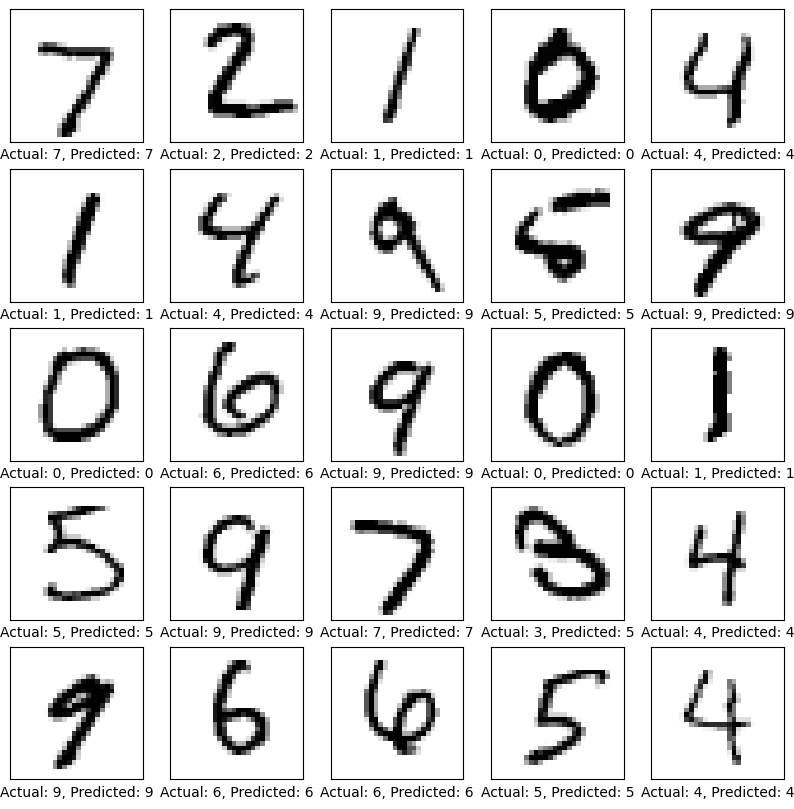

In [8]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    actual_value = y_test[i]
    predicted_value = predictions[i].argmax()
    plt.xlabel(f'Actual: {actual_value}, Predicted: {predicted_value}')

plt.show()

Confusin matrix for visualizing the accuracy of model

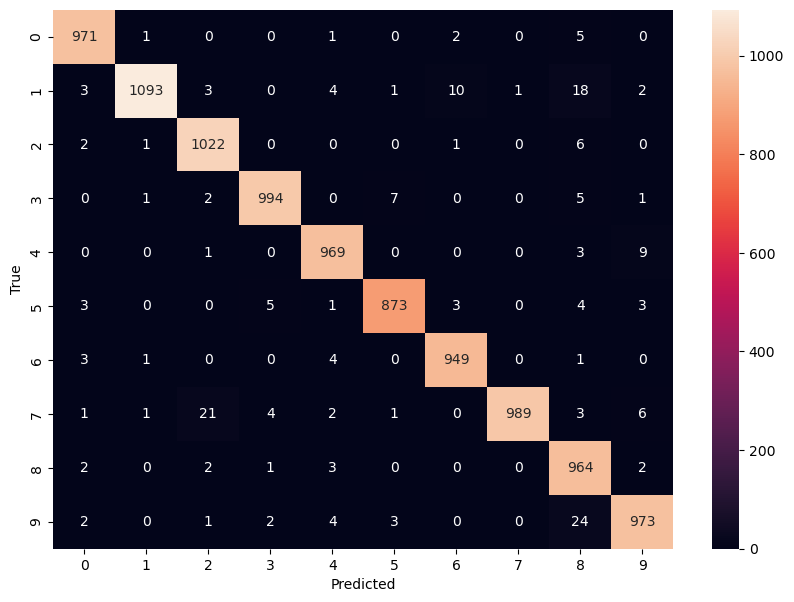

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [11]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.97%


# ✅ Conclusion

In this Jupyter notebook, I have successfully implemented a Convolutional Neural Network (CNN) to recognize handwritten digits from the MNIST dataset. The model was built using TensorFlow and Keras, employing layers such as `Conv2D` for convolutional processing of the images and `Dense` for classification. The data was first imported, visualized, and then normalized to aid in the training process.

The model's architecture was designed to first extract features using convolutional and pooling layers and then flatten the output for the dense layers to perform classification. The compilation of the model was done using the `adam` optimizer and `sparse_categorical_crossentropy` loss function, with accuracy as the metric for performance evaluation.

Training was conducted over 5 epochs, showing a steady decrease in loss and an increase in accuracy, indicating that the model was learning effectively. The final accuracy on the training set was impressive.

Model evaluation on the test set involved visual inspection of the predictions and calculation of the confusion matrix, which provided a detailed breakdown of the model's performance across all digit classes. The visualization of 25 test samples showed that the model could accurately predict the digit most of the time, with a final reported accuracy of ~97.97%. This high accuracy rate demonstrates that the model is highly effective in recognizing handwritten digits.

In conclusion, the results show the power of CNNs in image recognition and their effectiveness in classifying images based on learned features. Future work could explore model optimization, hyperparameter tuning, and testing the model on more complex datasets or in real-world scenarios.